In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from collections import Counter
from matplotlib.lines import Line2D
from scipy.stats import zscore

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from kneed import KneeLocator

In [3]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [4]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

In [5]:
## arrange data
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
male_df = male_df[keep_syllables]
#male_df=male_df.query('age<91')

# avarage per age or session
m_df = male_df.sort_index(level='age')
m_df=m_df.query('age<91')

avg_m_df = m_df.groupby(['age']).mean()

# normalize the data
m_norm = mm_norm_col(m_df)
avg_m_norm = mm_norm_col(avg_m_df)

# zscore
z_m = m_df.apply(zscore, axis=0)
avg_z_m = avg_m_df.apply(zscore, axis=0)

# log
m_log = np.log(m_df+1e-3)
avg_m_log = np.log(avg_m_df+1e-3)

# log and z_score
z_log = m_log.apply(zscore, axis=0)
avg_z_log = avg_m_log.apply(zscore, axis=0)


# sort syllable order by the average
syll_sort_m = (
    avg_m_norm.rolling(5, center=True, win_type="exponential")
    .mean(tau=1.5)
    .idxmax()
    .sort_values()
    .index
)

## clustering

In [6]:
format_plots()

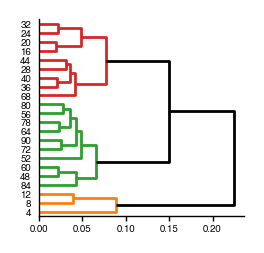

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

# Parameters for hierarchical clustering
linkage_method = 'ward'
distance_metric = 'euclidean'
data = avg_m_df.copy()
#data = m_df.copy()

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()
#data = data.apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

X = data.values

# Perform hierarchical clustering
Z = linkage(X, method=linkage_method, metric=distance_metric)


# Extract distances at which clusters are merged
distances = Z[:, 2]

# Determine the elbow point in the distances
kneedle = KneeLocator(range(1, len(distances) + 1), distances, S=8.0, curve="convex", direction="increasing")
elbow_point = kneedle.elbow

# Set the color threshold at the elbow point
color_threshold = distances[elbow_point] #objectively finding the elbow point

# Determine a manual threshold
color_threshold = 0.7 * max(Z[:, 2])  # half the maximum distance between clusters

# Set up the plot
fig, ax = plt.subplots(figsize=(1.3, 1.3))

# Plot dendrogram with objective color threshold
dendro = dendrogram(Z, labels=data.index.get_level_values('age'), ax=ax, 
                    color_threshold=color_threshold,
                    orientation='right', above_threshold_color='k',
                   )

ax.tick_params(axis='x', labelsize=3.5)
ax.tick_params(axis='y', labelsize=3.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
sns.despine()
plt.show()

In [8]:
c = PlotConfig()
#fig.savefig(c.dana_save_path / "fig1"/ '07_29_hir_clustering_male_raw.pdf')

In [9]:
## female

In [10]:
## arrange data for females
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
female_df = female_df[keep_syllables]


# for female:
f_df= female_df.groupby(['age','uuid']).mean()
# Update age value to 52 for rows with uuid in the list
uuids = ['f1d5dce5-f5cf-4b03-b07d-d9b8c1f034b0','6fa50ac7-6d49-4ef9-9059-3d90bdd8c5d4',
         'e9e05da8-fc59-40f3-a9c8-f57c492c6141','327e7fa1-2237-43d2-b25f-c1801912df33',
        '242bee8e-0ee7-45e7-8a13-678836a4cddb','552ec70f-0676-4471-8ab0-403e1fcf43e3','d6f254af-d55a-427a-96e0-c452a233cbe2']
f_df.reset_index(inplace=True)

age_mapping = {
    93: 94,
    95: 94,
    97: 98,
    98: 98,
    102: 98,
    103: 105,
    105: 105,
    107: 105
}

f_df['age'] = f_df['age'].map(age_mapping).fillna(f_df['age'])
f_df.loc[f_df['uuid'].isin(uuids), 'age'] = 52
# Set the index back
f_df.set_index(['age', 'uuid'], inplace=True)
f_df=f_df.query('age<91')

In [11]:
# avarage per age or session
m_df = f_df.sort_index(level='age')
avg_m_df = m_df.groupby(['age']).mean()

# normalize the data
m_norm = mm_norm_col(m_df)
avg_m_norm = mm_norm_col(avg_m_df)

# zscore
z_m = m_df.apply(zscore, axis=0)
avg_z_m = avg_m_df.apply(zscore, axis=0)

# log
m_log = np.log(m_df+1e-3)
avg_m_log = np.log(avg_m_df+1e-3)

# log and z_score
z_log = m_log.apply(zscore, axis=0)
avg_z_log = avg_m_log.apply(zscore, axis=0)


# sort syllable order by the average
syll_sort_m = (
    avg_m_norm.rolling(5, center=True, win_type="exponential")
    .mean(tau=1.5)
    .idxmax()
    .sort_values()
    .index
)

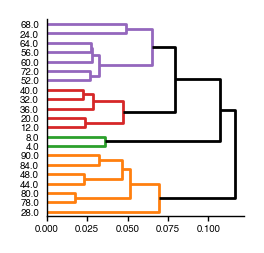

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from kneed import KneeLocator

# Parameters for hierarchical clustering
linkage_method = 'ward'
distance_metric = 'euclidean'
data = avg_m_df.copy()
X = data.values

# Perform hierarchical clustering
Z = linkage(X, method=linkage_method, metric=distance_metric)


# Extract distances at which clusters are merged
distances = Z[:, 2]

# Determine the elbow point in the distances
kneedle = KneeLocator(range(1, len(distances) + 1), distances, S=8.0, curve="convex", direction="increasing")
elbow_point = kneedle.elbow

# Set the color threshold at the elbow point
color_threshold = distances[elbow_point] #objectively finding the elbow point

# Determine a manual threshold
color_threshold =0.6 * max(Z[:, 2])  # half the maximum distance between clusters

# Set up the plot
fig, ax = plt.subplots(figsize=(1.3, 1.3))

# Plot dendrogram with objective color threshold
dendro = dendrogram(Z, labels=data.index.get_level_values('age'), ax=ax, 
                    color_threshold=color_threshold,
                    orientation='right', above_threshold_color='k',
                   )

ax.tick_params(axis='x', labelsize=3.5)
ax.tick_params(axis='y', labelsize=3.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
sns.despine()
plt.show()

In [13]:
c = PlotConfig()
#fig.savefig(c.dana_save_path / "fig1"/ '07_29_hir_clustering_female_raw.pdf')